In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

%pylab inline
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

Populating the interactive namespace from numpy and matplotlib
/Users/rubenexojo/Library/Mobile Documents/com~apple~CloudDocs/MSc Mathematical Finance - Manchester/dissertation/dissertation-codes/venv/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['std', 'var', 'mean']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [111]:
def __read_(name):
    return pd.read_csv('/Users/rubenexojo/Library/Mobile Documents/com~apple~CloudDocs/MSc Mathematical Finance - Manchester/dissertation/dissertation-codes/data/' + name + '.csv', sep=',')

def __save_eps(name, par):
    plt.savefig('/Users/rubenexojo/Library/Mobile Documents/com~apple~CloudDocs/MSc Mathematical Finance - Manchester/dissertation/dissertation-tex/main/img/' + name + '_μ' + str(par[0]) + '_r' + str(par[1]) + '_σ' + str(par[2]) + '_ρ' + str(par[3]) + '.eps', format='eps')

def __save_jpg(name, par):
    return plt.savefig('/Users/rubenexojo/Library/Mobile Documents/com~apple~CloudDocs/MSc Mathematical Finance - Manchester/dissertation/dissertation-codes/img/' + name + '_μ' + str(par[0]) + '_r' + str(par[1]) + '_σ' + str(par[2]) + '_ρ' + str(par[3]) + '.jpg', format='jpg')

def __annualised_return_(μ, real_μ, par):
    figure(num=None, figsize=(10, 6), dpi=70, facecolor='w', edgecolor='k')
    ### GRID
    plt.grid(color='k', linestyle='-.', linewidth=0.05)
    ### PLOT
    plt.plot(k, μ, color='darkblue')
    plt.plot(k, real_μ, color = 'red', label=r'$\mu$', linestyle='-.', linewidth=1.6)
    ## LEGEND
    plt.legend(loc="lower right", fontsize=15)
    ## LABELS
    plt.xlabel(r'Number of episodes (Aggregated, $M=20 000$)', labelpad=20, fontsize=16)
    plt.ylabel(r'Annualised Return', labelpad=20, fontsize=16)
    __save_jpg('annualised_return', par)
    __save_epg('annualised_return', par)

def __sample_mean_(mean, real_mean, par):
    figure(num=None, figsize=(10, 6), dpi=70, facecolor='w', edgecolor='k')
    ### GRID
    plt.grid(color='k', linestyle='-.', linewidth=0.05)
    ### PLOT
    plt.plot(k, mean, color='darkblue')
    plt.plot(k, real_mean, color = 'red', label=r'$z$', linestyle='-.', linewidth=1.6)
    ## LEGEND
    plt.legend(loc="lower right", fontsize=15)
    ## LABELS
    plt.xlabel(r'Number of episodes (Aggregated, $M=20 000$)', labelpad=20, fontsize=16)
    plt.ylabel(r'Sample Mean', labelpad=20, fontsize=16)
    __save_('sample_mean', par)

def __variance_(var, real_var, par):
    figure(num=None, figsize=(10, 6), dpi=70, facecolor='w', edgecolor='k')
    ### GRID
    plt.grid(color='k', linestyle='-.', linewidth=0.05)
    ### PLOT
    plt.plot(k, var, color='darkblue')
    plt.plot(k, real_var, color = 'red', label=r'$\sigma^2$', linestyle='-.', linewidth=1.6)
    ## LEGEND
    plt.legend(loc="lower right", fontsize=15)
    ## LABELS
    plt.xlabel(r'Number of episodes (Aggregated, $M=20 000$)', labelpad=20, fontsize=16)
    plt.ylabel(r'Variance', labelpad=20, fontsize=16)
    __save_('variance', par)

def __std_(var, real_var, par):
    figure(num=None, figsize=(10, 6), dpi=70, facecolor='w', edgecolor='k')
    ### GRID
    plt.grid(color='k', linestyle='-.', linewidth=0.05)
    ### PLOT
    plt.plot(k, var, color='darkblue')
    plt.plot(k, real_var, color = 'red', label=r'$\sigma$', linestyle='-.', linewidth=1.6)
    ## LEGEND
    plt.legend(loc="lower right", fontsize=15)
    ## LABELS
    plt.xlabel(r'Number of episodes (Aggregated, $M=20 000$)', labelpad=20, fontsize=16)
    plt.ylabel(r'Standard Deviation', labelpad=20, fontsize=16)
    __save_('std', par)

In [75]:
### μ = 0.50; r = 0.02; σ = 0.2; ρ = 2.4
df1  = __read_('sample_parameters_μ0.5_r0.02_σ0.2_ρ2.4')
par  = [0.5, 0.02, 0.2, 2.4]
k    = df1['k'].tolist()
real_mean = [1.4 for _ in k]
mean = df1['mean'].tolist()
real_var = [0.20**2 for _ in k]
var  = df1['variance'].tolist()
real_std = [0.20 for _ in k]
std  = df1['std'].tolist()
real_μ = [0.5 for _ in k]
μ    = df1['μ'].tolist()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


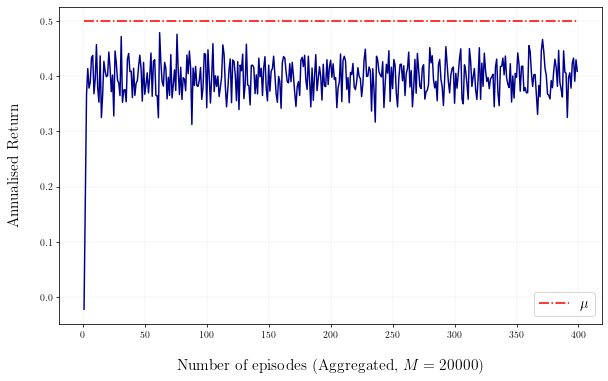

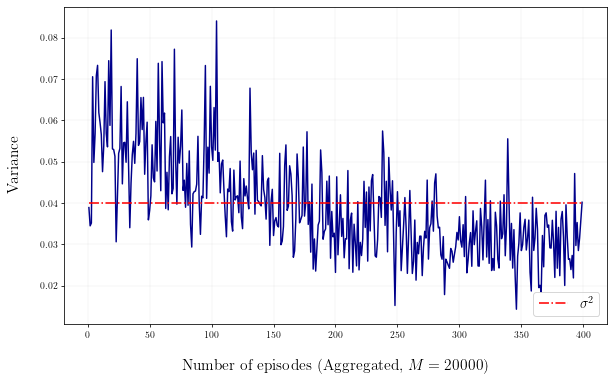

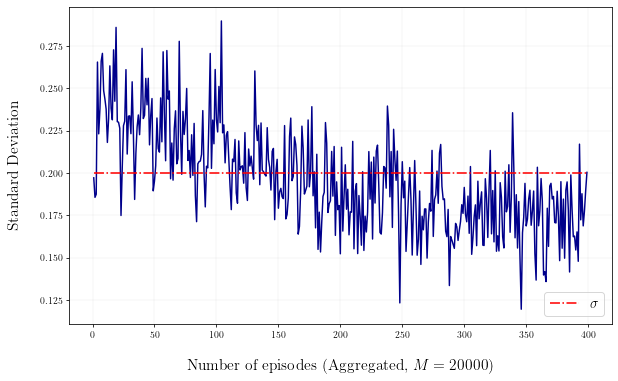

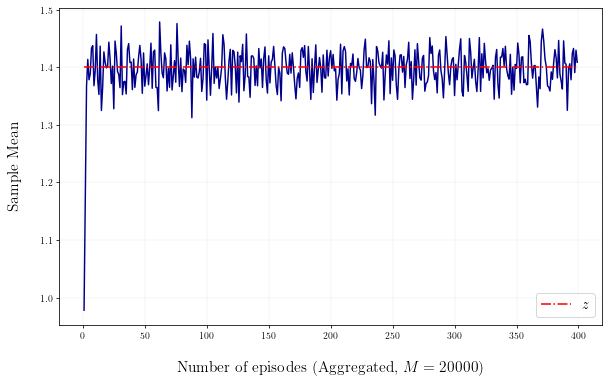

In [112]:
__annualised_return_(μ, real_μ, par)
__variance_(var, real_var, par)
__std_(std, real_std, par)
__sample_mean_(mean, real_mean, par)


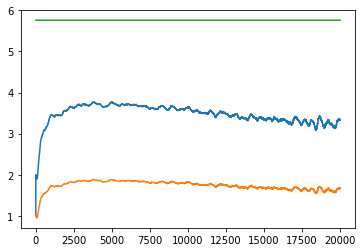

In [31]:
df2 = read('rl_parameters_μ0.5_r0.02_σ0.2_ρ2.4')
Θ0 = df2['θ0'].tolist()
Θ1 = df2['θ1'].tolist()
Θ2 = df2['θ2'].tolist()
Θ3 = df2['θ3'].tolist()
φ1 = df2['ϕ1'].tolist()
φ2 = df2['ϕ2'].tolist()
k = [i for i in range(len(Θ0))]
ρ2 = [2.4**2 for _ in range(len(Θ0))]

plt.plot(k, Θ3)
plt.plot(k, φ2)
plt.plot(k, ρ2)